In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df_index = pd.read_csv("data/economic_index.csv")
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [4]:
df_index.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [5]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [6]:
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

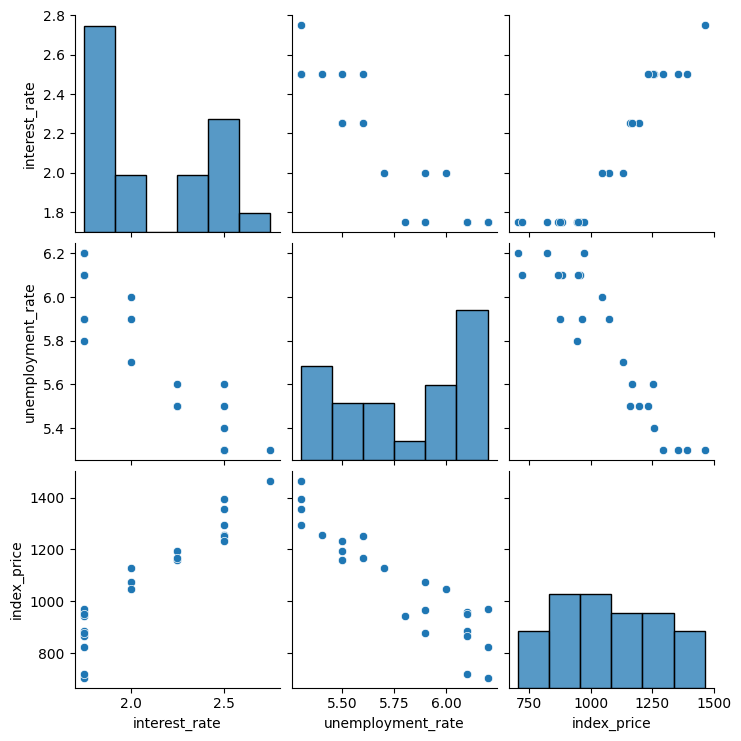

In [7]:
import seaborn as sns
sns.pairplot(df_index)

In [8]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment Rate')

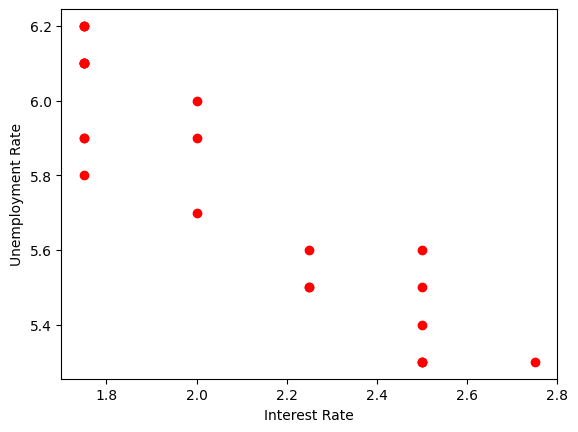

In [10]:
plt.scatter(df_index['interest_rate'],df_index['unemployment_rate'],color='r')
plt.xlabel("Interest Rate")
plt.ylabel("Unemployment Rate")

In [11]:
x=df_index.iloc[:,:-1]
y=df_index.iloc[:,-1]

In [12]:
x.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [13]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

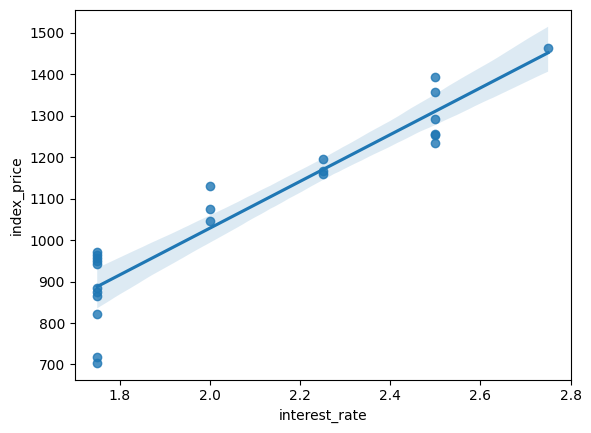

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x='interest_rate', y='index_price', data=df_index)
plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()
X_train =scaler.fit_transform(X_train)
X_test =scaler.transform(X_test)

In [21]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [22]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [24]:
regression.fit(X_train,y_train)

LinearRegression()

In [ ]:
## Cross validation
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [26]:
np.mean(validation_score)

np.float64(-5914.828180162386)

In [27]:
## prediction
y_pred = regression.predict(X_test)

In [28]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [29]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

5793.762887712569
59.935781523235484
76.11677139574805


In [31]:
score = r2_score(y_test,y_pred)
print(score)
#display adjusted R-squared
print(1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

0.8278978091457145
0.7131630152428576


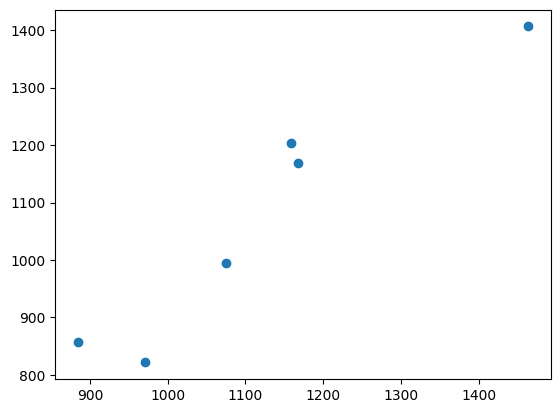

In [32]:
plt.scatter(y_test,y_pred)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


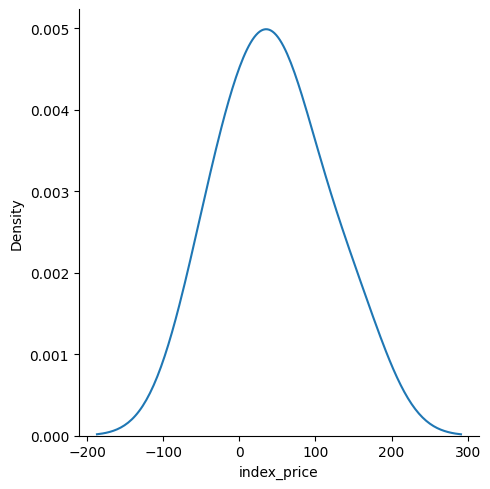

In [33]:
residuals = y_test -y_pred
print(residuals)
sns.displot(residuals,kind='kde')

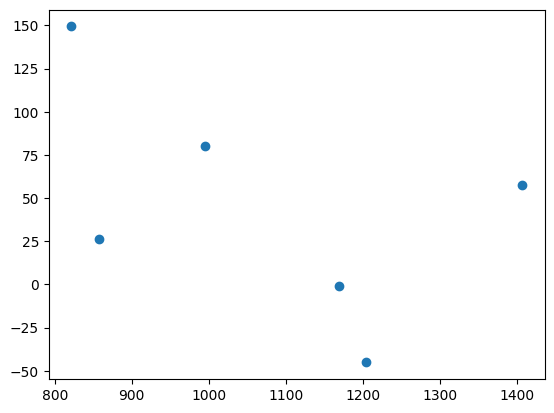

In [34]:
## Scatter plot with respect to prediction and residuals
plt.scatter(y_pred,residuals)

In [35]:
import statsmodels.api as sm
model = sm.OLS(y_train,X_train).fit()
prediction = model.predict(X_test)
print(prediction)

[ 150.78325954 -231.79392541  353.06855924 -195.73554836  -58.53452146
  114.72488249]


In [38]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Fri, 24 Jan 2025   Prob (F-statistic):                       0.754
Time:                        13:29:58   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Rohit\DataScience\MLImplementation\linvenv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [39]:
print(regression.coef_)

[  88.27275507 -116.25716066]
